In [2]:
import ROOT as R

Welcome to JupyROOT 6.24/02


In [3]:
files={}
files['PMT']=R.TFile("LYSO_OPT_OPT2_PMT.root")
files['MS3_DRY']=R.TFile('data/MS3.root')
files['OPT_OPT2_DRY']=R.TFile('LYSO_ARRAY_DRY_OPT_OPT2.root')

In [4]:
g={}
for tag in ['MS3','OPT', 'OPT2','OPT2bis']:
    for t in ['lyAbs','lyNorm','tau','lyDT']:
        g['%s_%s_PMT'%(t,tag)]=files['PMT'].Get('%s_%s'%(t,tag))
g['LY_MS3_DRY']=files['MS3_DRY'].Get('ly_array')
g['LY_OPT_DRY']=files['OPT_OPT2_DRY'].Get('LY_OPT_DRY')
g['LY_OPT2_DRY']=files['OPT_OPT2_DRY'].Get('LY_OPT2_DRY')


In [5]:
arrays={}
arrays['MS3']={
    416:{'file':'data/tree_FirstRun006084_LastRun006087_ARRAY000416_OVSCAN_SUMMARY.root','prod':1},
    586:{'file':'data/tree_FirstRun006096_LastRun006099_ARRAY000586_OVSCAN_SUMMARY.root','prod':3},
    708:{'file':'data/tree_FirstRun006108_LastRun006111_ARRAY000708_OVSCAN_SUMMARY.root','prod':4},
    531:{'file':'data/tree_FirstRun006120_LastRun006123_ARRAY000531_OVSCAN_SUMMARY.root','prod':5},
    606:{'file':'data/tree_FirstRun006134_LastRun006137_ARRAY000606_OVSCAN_SUMMARY.root','prod':9},
    481:{'file':'data/tree_FirstRun006152_LastRun006155_ARRAY000481_OVSCAN_SUMMARY.root','prod':10},
}

arrays['OPT']={
    809:{'file':'data/tree_FirstRun006090_LastRun006093_ARRAY000809_OVSCAN_SUMMARY.root','prod':1},
    805:{'file':'data/tree_FirstRun006102_LastRun006105_ARRAY000805_OVSCAN_SUMMARY.root','prod':3},
    799:{'file':'data/tree_FirstRun006114_LastRun006117_ARRAY000799_OVSCAN_SUMMARY.root','prod':4},
    800:{'file':'data/tree_FirstRun006126_LastRun006129_ARRAY000800_OVSCAN_SUMMARY.root','prod':5},
    803:{'file':'data/tree_FirstRun006146_LastRun006149_ARRAY000803_OVSCAN_SUMMARY.root','prod':9},
    796:{'file':'data/tree_FirstRun006158_LastRun006161_ARRAY000796_OVSCAN_SUMMARY.root','prod':10}
}

arrays['OPT2']={
    810:{'file':'data/tree_FirstRun007056_LastRun007059_ARRAY000810_OVSCAN_SUMMARY.root','prod':1},
    821:{'file':'data/tree_FirstRun007062_LastRun007065_ARRAY000821_OVSCAN_SUMMARY.root','prod':5},
    830:{'file':'data/tree_FirstRun007068_LastRun007071_ARRAY000830_OVSCAN_SUMMARY.root','prod':10}
}

arrays['OPT2bis']={
    811:{'file':'data/tree_FirstRun007074_LastRun007077_ARRAY000811_OVSCAN_SUMMARY.root','prod':1},
    822:{'file':'data/tree_FirstRun007080_LastRun007083_ARRAY000822_OVSCAN_SUMMARY.root','prod':5},
    831:{'file':'data/tree_FirstRun007086_LastRun007089_ARRAY000831_OVSCAN_SUMMARY.root','prod':10}
}

arrays['OPT2avg']={
    810:{'file':'data/tree_FirstRun007056_LastRun007059_ARRAY000810_OVSCAN_SUMMARY.root','prod':1},
    821:{'file':'data/tree_FirstRun007062_LastRun007065_ARRAY000821_OVSCAN_SUMMARY.root','prod':5},
    830:{'file':'data/tree_FirstRun007068_LastRun007071_ARRAY000830_OVSCAN_SUMMARY.root','prod':10},
    811:{'file':'data/tree_FirstRun007074_LastRun007077_ARRAY000811_OVSCAN_SUMMARY.root','prod':1},
    822:{'file':'data/tree_FirstRun007080_LastRun007083_ARRAY000822_OVSCAN_SUMMARY.root','prod':5},
    831:{'file':'data/tree_FirstRun007086_LastRun007089_ARRAY000831_OVSCAN_SUMMARY.root','prod':10}
}


map_prod={
    1:0,
    3:1,
    4:2,
    5:3,
    9:4,
    10:5
}

In [19]:
for tag in ['MS3','OPT','OPT2','OPT2bis','OPT2avg']:
    for t in ['LY','LYDT','sigmaT','sigmaT_4V','sigmaTvsLYDT','sigmaT4VvsLYDT','XT']:
        g['%s_%s'%(t,tag)]=R.TGraphErrors(len(map_prod))

#If more than one array from a producer are under the same tag, evaluate LY,XT,sigmaT average
for tag in ['MS3','OPT','OPT2','OPT2bis','OPT2avg']:
#for tag in ['MS3']:

    array_per_prod = [0] * len(map_prod)

    for ia,ar in enumerate(arrays[tag]):
        files[ar]=R.TFile(arrays[tag][ar]['file'])
        g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
        g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
        g['XT_%d'%ar]=files[ar].Get('XT_vs_bar')
        iv=map_prod[arrays[tag][ar]['prod']]
        array_per_prod[iv]+=1
        if (arrays[tag][ar]['prod']==9 and tag=='OPT'):
            tau=g['tau_MS3_PMT'].GetY()[iv]
        elif (tag=='OPT2bis'):
            tau=g['tau_OPT2_PMT'].GetY()[iv]
        elif (tag=='OPT2avg'):
            tau=g['tau_OPT2_PMT'].GetY()[iv]
        else:
            tau=g['tau_%s_PMT'%tag].GetY()[iv]
        
        #print(ar,tau,arrays[tag][ar]['prod'])
        pos=iv
        if (tag=='OPT'):
            pos+=0.1
        elif(tag=='OPT2'):
            pos+=0.2
        elif(tag=='OPT2bis'):
            pos+=0.3
        elif(tag=='OPT2avg'):
            pos+=0.4
        
        g['LY_%s'%tag].SetPoint(iv,pos,g['LY_%s'%tag].GetY()[iv]+g['LY_%d'%ar].GetY()[1]*3950/48.8) #use 4V measure
        g['LY_%s'%tag].SetPointError(iv,0,g['LY_%s'%tag].GetEY()[iv]+(g['LY_%d'%ar].GetEY()[1]*3950/48.8)**2)
        g['LYDT_%s'%tag].SetPoint(iv,pos,g['LYDT_%s'%tag].GetY()[iv]+(g['LY_%d'%ar].GetY()[1]*3950/48.8/tau)) #use 4V measure
        g['LYDT_%s'%tag].SetPointError(iv,0,g['LYDT_%s'%tag].GetEY()[iv]+(g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau)**2)
        g['sigmaT_%s'%tag].SetPoint(iv,pos,g['sigmaT_%s'%tag].GetY()[iv]+g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
        g['sigmaT_%s'%tag].SetPointError(iv,0,g['sigmaT_%s'%tag].GetEY()[iv]+(g['sigmaT_%d'%ar].GetEY()[0])**2) #use 8V measure
        g['sigmaT_4V_%s'%tag].SetPoint(iv,pos,g['sigmaT_4V_%s'%tag].GetY()[iv]+g['sigmaT_%d'%ar].GetY()[1]) #use 4V measure
        g['sigmaT_4V_%s'%tag].SetPointError(iv,0,g['sigmaT_4V_%s'%tag].GetEY()[iv]+(g['sigmaT_%d'%ar].GetEY()[1])**2) #use 4V measure
        g['XT_%s'%tag].SetPoint(iv,pos,g['XT_%s'%tag].GetY()[iv]+g['XT_%d'%ar].GetY()[0]) #use 8V measure
        g['XT_%s'%tag].SetPointError(iv,0,g['XT_%s'%tag].GetEY()[iv]+(g['XT_%d'%ar].GetEY()[0])**2)

        print(g['LY_%d'%ar].GetEY()[1]*3950/48.8)
        g['LY_OPT2avg'].Print()

    for var in ['LY','LYDT','sigmaT','XT','sigmaT_4V']:
        print(tag,var,array_per_prod)
        for iv in range(len(map_prod)):
            pos=iv
            if (tag=='OPT'):
                pos+=0.1
            elif(tag=='OPT2'):
                pos+=0.2
            elif(tag=='OPT2bis'):
                pos+=0.3
            elif(tag=='OPT2avg'):
                pos+=0.4
            #print(iv, g['LY_%s'%tag].GetY()[iv], array_per_prod[iv])
            if array_per_prod[iv]!=0:
                print 
                g['%s_%s'%(var,tag)].SetPoint(iv, pos, g['%s_%s'%(var,tag)].GetY()[iv]/array_per_prod[iv])
                g['%s_%s'%(var,tag)].SetPointError(iv, 0, (g['%s_%s'%(var,tag)].GetEY()[iv]**0.5)/array_per_prod[iv])

    for iv in range(len(map_prod)):
        
        g['sigmaTvsLYDT_%s'%tag].SetPoint(iv,g['LYDT_%s'%tag].GetY()[iv],g['sigmaT_%s'%tag].GetY()[iv]) #use 8V measure
        g['sigmaTvsLYDT_%s'%tag].SetPointError(iv,g['LYDT_%s'%tag].GetEY()[iv],g['sigmaT_%s'%tag].GetEY()[iv])
        g['sigmaT4VvsLYDT_%s'%tag].SetPoint(iv,g['LYDT_%s'%tag].GetY()[iv],g['sigmaT_4V_%s'%tag].GetY()[iv]) #use 4V measure
        g['sigmaT4VvsLYDT_%s'%tag].SetPointError(iv,g['LYDT_%s'%tag].GetEY()[iv],g['sigmaT_4V_%s'%tag].GetEY()[iv])

# print(array_per_prod)        
# g['LY_OPT2'].Print()
# g['LYDT_OPT2'].Print()
# g['LYDT_OPT2bis'].Print()
g['LY_OPT2avg'].Print()
# g['LY_OPT2bis'].Print()
# g['LY_OPT2avg'].Print()
# g['sigmaT_MS3'].Print()
# g['sigmaT_OPT2'].Print()
# g['sigmaT_OPT2bis'].Print()
# g['sigmaT_OPT2avg'].Print()

104.71169703846552
137.7563237509357
142.39339134314162
77.23715822825368
157.00087435378626
163.20890586940192
MS3 LY [1, 1, 1, 1, 1, 1]
MS3 LYDT [1, 1, 1, 1, 1, 1]
MS3 sigmaT [1, 1, 1, 1, 1, 1]
MS3 XT [1, 1, 1, 1, 1, 1]
MS3 sigmaT_4V [1, 1, 1, 1, 1, 1]
103.09481016561267
92.7710154493997
92.48051042709419
48.12550346083652
197.20976531073538
91.7828208942994
OPT LY [1, 1, 1, 1, 1, 1]
OPT LYDT [1, 1, 1, 1, 1, 1]
OPT sigmaT [1, 1, 1, 1, 1, 1]
OPT XT [1, 1, 1, 1, 1, 1]
OPT sigmaT_4V [1, 1, 1, 1, 1, 1]
253.86512281360362
160.52763430324399
161.56942800682046
OPT2 LY [1, 0, 0, 1, 0, 1]
OPT2 LYDT [1, 0, 0, 1, 0, 1]
OPT2 sigmaT [1, 0, 0, 1, 0, 1]
OPT2 XT [1, 0, 0, 1, 0, 1]
OPT2 sigmaT_4V [1, 0, 0, 1, 0, 1]
218.4548320998602
52.64498392746241
115.69343987703192
OPT2bis LY [1, 0, 0, 1, 0, 1]
OPT2bis LYDT [1, 0, 0, 1, 0, 1]
OPT2bis sigmaT [1, 0, 0, 1, 0, 1]
OPT2bis XT [1, 0, 0, 1, 0, 1]
OPT2bis sigmaT_4V [1, 0, 0, 1, 0, 1]
253.86512281360362
160.52763430324399
161.56942800682046
218.4548320998

In [6]:
g['relGain_LY_OPT']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_opt=g['LY_OPT'].GetY()[iv]
    ly_arr_ms3=g['LY_MS3'].GetY()[iv]
    if (v!=9):
        ly_pmt_opt=g['lyNorm_OPT_PMT'].GetY()[iv]
    else:
        ly_pmt_opt=g['lyNorm_MS3_PMT'].GetY()[iv]
    ly_pmt_ms3=g['lyNorm_MS3_PMT'].GetY()[iv]
    if (ly_arr_ms3>0 and ly_arr_opt>0):
        print(v,ly_arr_opt,ly_pmt_opt,ly_arr_ms3,ly_pmt_ms3)
        g['relGain_LY_OPT'].SetPoint(iv,iv,(ly_arr_opt/ly_pmt_opt)/(ly_arr_ms3/ly_pmt_ms3))
        g['relGain_LY_OPT'].SetPointError(iv,0,0.07)
g['relGain_LY_OPT'].Print()

1 4332.1987164360635 0.7830257093592288 3949.3398168315557 0.8497261839751226
3 4419.884756041635 1.0610635620696511 3825.939483034411 1.0049200652610786
4 3973.3939881484903 0.9003008916263927 3744.4647840520242 1.0139715795188575
5 4580.492510340601 0.9569671263485415 4615.698030449256 0.9546059554381784
9 4249.621201724178 1.015656232995119 3924.518019756242 1.015656232995119
10 4721.035328173878 1.078853965767325 4269.835933536657 0.9590313731024819
x[0]=0, y[0]=1.19038, ex[0]=0, ey[0]=0.07
x[1]=1, y[1]=1.09411, ex[1]=0, ey[1]=0.07
x[2]=2, y[2]=1.19512, ex[2]=0, ey[2]=0.07
x[3]=3, y[3]=0.989924, ex[3]=0, ey[3]=0.07
x[4]=4, y[4]=1.08284, ex[4]=0, ey[4]=0.07
x[5]=5, y[5]=0.98287, ex[5]=0, ey[5]=0.07


In [7]:
g['relGain_LY_OPT2']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_ms3=g['LY_MS3'].GetY()[iv]
    ly_arr_opt2=g['LY_OPT2'].GetY()[iv]
    if (v!=9):
        ly_pmt_opt2=g['lyNorm_OPT2_PMT'].GetY()[iv]
    else:
        ly_pmt_opt2=g['lyNorm_MS3_PMT'].GetY()[iv]
    ly_pmt_ms3=g['lyNorm_MS3_PMT'].GetY()[iv]
    if (ly_arr_ms3>0 and ly_arr_opt2>0):
        print(v,ly_arr_opt2,ly_pmt_opt2,ly_arr_ms3,ly_pmt_ms3)
        g['relGain_LY_OPT2'].SetPoint(iv,iv,(ly_arr_opt2/ly_pmt_opt2)/(ly_arr_ms3/ly_pmt_ms3))
        g['relGain_LY_OPT2'].SetPointError(iv,0,0.07)
g['relGain_LY_OPT2'].Print()

1 4354.8247809046725 0.8970757748102424 3949.3398168315557 0.8497261839751226
5 4265.540987665711 0.9043813664721796 4615.698030449256 0.9546059554381784
10 4740.439022148354 1.1553751052428083 4269.835933536657 0.9590313731024819
x[0]=0, y[0]=1.04447, ex[0]=0, ey[0]=0.07
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3, y[3]=0.97546, ex[3]=0, ey[3]=0.07
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5, y[5]=0.921546, ex[5]=0, ey[5]=0.07


In [8]:
g['relGain_LY_OPT2bis']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_ms3=g['LY_MS3'].GetY()[iv]
    ly_arr_OPT2bis=g['LY_OPT2bis'].GetY()[iv]
    if (v!=9):
        ly_pmt_OPT2bis=g['lyNorm_OPT2_PMT'].GetY()[iv]
    else:
        ly_pmt_OPT2bis=g['lyNorm_MS3_PMT'].GetY()[iv]
    ly_pmt_ms3=g['lyNorm_MS3_PMT'].GetY()[iv]
    if (ly_arr_ms3>0 and ly_arr_OPT2bis>0):
        print(v,ly_arr_OPT2bis,ly_pmt_OPT2bis,ly_arr_ms3,ly_pmt_ms3)
        g['relGain_LY_OPT2bis'].SetPoint(iv,iv,(ly_arr_OPT2bis/ly_pmt_OPT2bis)/(ly_arr_ms3/ly_pmt_ms3))
        g['relGain_LY_OPT2bis'].SetPointError(iv,0,0.07)
g['relGain_LY_OPT2bis'].Print()

1 4337.246367567669 0.8970757748102424 3949.3398168315557 0.8497261839751226
5 4187.295673092939 0.9043813664721796 4615.698030449256 0.9546059554381784
10 4501.983587177374 1.1553751052428083 4269.835933536657 0.9590313731024819
x[0]=0, y[0]=1.04025, ex[0]=0, ey[0]=0.07
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3, y[3]=0.957566, ex[3]=0, ey[3]=0.07
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5, y[5]=0.87519, ex[5]=0, ey[5]=0.07


In [9]:
g['relGain_LY_OPT2avg']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_ms3=g['LY_MS3'].GetY()[iv]
    ly_arr_OPT2avg=g['LY_OPT2avg'].GetY()[iv]
    if (v!=9):
        ly_pmt_OPT2avg=g['lyNorm_OPT2_PMT'].GetY()[iv]
    else:
        ly_pmt_OPT2avg=g['lyNorm_MS3_PMT'].GetY()[iv]
    ly_pmt_ms3=g['lyNorm_MS3_PMT'].GetY()[iv]
    if (ly_arr_ms3>0 and ly_arr_OPT2avg>0):
        print(v,ly_arr_OPT2avg,ly_pmt_OPT2avg,ly_arr_ms3,ly_pmt_ms3)
        g['relGain_LY_OPT2avg'].SetPoint(iv,iv,(ly_arr_OPT2avg/ly_pmt_OPT2avg)/(ly_arr_ms3/ly_pmt_ms3))
        g['relGain_LY_OPT2avg'].SetPointError(iv,0,0.07)
g['relGain_LY_OPT2avg'].Print()

1 4346.035574236171 0.8970757748102424 3949.3398168315557 0.8497261839751226
5 4226.418330379325 0.9043813664721796 4615.698030449256 0.9546059554381784
10 4621.211304662864 1.1553751052428083 4269.835933536657 0.9590313731024819
x[0]=0, y[0]=1.04236, ex[0]=0, ey[0]=0.07
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3, y[3]=0.966513, ex[3]=0, ey[3]=0.07
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5, y[5]=0.898368, ex[5]=0, ey[5]=0.07


In [10]:
map_prod_ms3_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}
g['LY_MS3'].Print()
g['LY_MS3_DRY'].Print()
g['rel_MS3_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_ms3=g['LY_MS3'].GetY()[iv]/g['LY_MS3'].GetY()[0]
    ly_arr_dry_ms3=g['LY_MS3_DRY'].GetY()[map_prod_ms3_dry[v]]/g['LY_MS3_DRY'].GetY()[0]
    if (ly_arr_grease_ms3>0 and ly_arr_dry_ms3>0):
        g['rel_MS3_DRY_GREASE'].SetPoint(iv,ly_arr_grease_ms3,ly_arr_dry_ms3)
        g['rel_MS3_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_MS3_DRY_GREASE'].Print()

g['LY_DRY_GREASE_MS3']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_ms3=g['LY_MS3'].GetY()[iv]/g['LY_MS3_DRY'].GetY()[map_prod_ms3_dry[v]]/2600.
    if (ly_arr_grease_ms3>0):
        g['LY_DRY_GREASE_MS3'].SetPoint(iv,iv,ly_arr_grease_ms3)
        g['LY_DRY_GREASE_MS3'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_MS3'].Print()

x[0]=0, y[0]=3949.34, ex[0]=0, ey[0]=104.712
x[1]=1, y[1]=3825.94, ex[1]=0, ey[1]=137.756
x[2]=2, y[2]=3744.46, ex[2]=0, ey[2]=142.393
x[3]=3, y[3]=4615.7, ex[3]=0, ey[3]=77.2372
x[4]=4, y[4]=3924.52, ex[4]=0, ey[4]=157.001
x[5]=5, y[5]=4269.84, ex[5]=0, ey[5]=163.209
x[0]=0.26, y[0]=0.997918, ex[0]=0, ey[0]=0.0292477
x[1]=1.26, y[1]=1.1318, ex[1]=0, ey[1]=0.0375413
x[2]=2.26, y[2]=0.961765, ex[2]=0, ey[2]=0.0326065
x[3]=3.26, y[3]=0.979477, ex[3]=0, ey[3]=0.0338506
x[4]=4.26, y[4]=1.07134, ex[4]=0, ey[4]=0.0401968
x[5]=5.26, y[5]=0.903504, ex[5]=0, ey[5]=0.0794499
x[6]=6.26, y[6]=0.870008, ex[6]=0, ey[6]=0.0354183
x[7]=7.26, y[7]=1.02556, ex[7]=0, ey[7]=0.0325095
x[8]=8.26, y[8]=1.05497, ex[8]=0, ey[8]=0.0400633
x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0.968754, y[1]=0.963771, ex[1]=0.03, ey[1]=0.03
x[2]=0.948124, y[2]=0.98152, ex[2]=0.03, ey[2]=0.03
x[3]=1.16873, y[3]=1.07357, ex[3]=0.03, ey[3]=0.03
x[4]=0.993715, y[4]=1.0277, ex[4]=0.03, ey[4]=0.03
x[5]=1.08115, y[5]=1.05717, ex[

In [11]:
g['rel_OPT_DRY_GREASE']=R.TGraphErrors(6)

for v,iv in map_prod.items():
    ly_arr_grease=g['LY_OPT'].GetY()[iv]/g['LY_OPT'].GetY()[0]
    ly_arr_dry=g['LY_OPT_DRY'].GetY()[iv]/g['LY_OPT_DRY'].GetY()[0]
    if (ly_arr_grease>0 and ly_arr_dry>0):
        g['rel_OPT_DRY_GREASE'].SetPoint(iv,ly_arr_grease,ly_arr_dry)
        g['rel_OPT_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT_DRY_GREASE'].Print()


g['LY_DRY_GREASE_OPT']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    if g['LY_OPT_DRY'].GetY()[iv]>0:
        ly_arr_grease=g['LY_OPT'].GetY()[iv]/g['LY_OPT_DRY'].GetY()[iv]
    else:
        ly_arr_grease=0
    if (ly_arr_grease>0):
        g['LY_DRY_GREASE_OPT'].SetPoint(iv,iv+0.1,ly_arr_grease)
        g['LY_DRY_GREASE_OPT'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT'].Print()

x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=1.02024, y[1]=1.06616, ex[1]=0.03, ey[1]=0.03
x[2]=0.917177, y[2]=0.96228, ex[2]=0.03, ey[2]=0.03
x[3]=1.05731, y[3]=1.04207, ex[3]=0.03, ey[3]=0.03
x[4]=0.980939, y[4]=1.04321, ex[4]=0.03, ey[4]=0.03
x[5]=1.08976, y[5]=1.10857, ex[5]=0.03, ey[5]=0.03
x[0]=0.1, y[0]=1.67511, ex[0]=0.03, ey[0]=0.03
x[1]=1.1, y[1]=1.60296, ex[1]=0.03, ey[1]=0.03
x[2]=2.1, y[2]=1.59659, ex[2]=0.03, ey[2]=0.03
x[3]=3.1, y[3]=1.69961, ex[3]=0.03, ey[3]=0.03
x[4]=4.1, y[4]=1.57512, ex[4]=0.03, ey[4]=0.03
x[5]=5.1, y[5]=1.64667, ex[5]=0.03, ey[5]=0.03


In [12]:
map_prod_opt2_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}

g['rel_OPT2_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_opt2=g['LY_OPT2'].GetY()[iv]/g['LY_OPT2'].GetY()[0]
    ly_arr_dry_opt2=g['LY_OPT2_DRY'].GetY()[map_prod[v]]/g['LY_OPT2_DRY'].GetY()[0]
    if (ly_arr_grease_opt2>0 and ly_arr_dry_opt2>0):
        g['rel_OPT2_DRY_GREASE'].SetPoint(iv,ly_arr_grease_opt2,ly_arr_dry_opt2)
        g['rel_OPT2_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT2_DRY_GREASE'].Print()

g['LY_DRY_GREASE_OPT2']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    if g['LY_OPT2_DRY'].GetY()[map_prod[v]]>0:
        ly_arr_grease_opt2=g['LY_OPT2'].GetY()[iv]/g['LY_OPT2_DRY'].GetY()[map_prod[v]]
    else:
        ly_arr_grease_opt2=0
    if (ly_arr_grease_opt2>0):
        g['LY_DRY_GREASE_OPT2'].SetPoint(iv,iv+0.2,ly_arr_grease_opt2)
        g['LY_DRY_GREASE_OPT2'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT2'].Print()

x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0.979498, y[3]=0.951704, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=1.08855, y[5]=1.09689, ex[5]=0.03, ey[5]=0.03
x[0]=0.2, y[0]=1.60216, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.2, y[3]=1.64895, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5.2, y[5]=1.58997, ex[5]=0.03, ey[5]=0.03


In [13]:
map_prod_OPT2bis_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}

g['rel_OPT2bis_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_OPT2bis=g['LY_OPT2bis'].GetY()[iv]/g['LY_OPT2bis'].GetY()[0]
    ly_arr_dry_OPT2bis=g['LY_OPT2_DRY'].GetY()[map_prod[v]]/g['LY_OPT2_DRY'].GetY()[0]
    if (ly_arr_grease_OPT2bis>0 and ly_arr_dry_OPT2bis>0):
        g['rel_OPT2bis_DRY_GREASE'].SetPoint(iv,ly_arr_grease_OPT2bis,ly_arr_dry_OPT2bis)
        g['rel_OPT2bis_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT2bis_DRY_GREASE'].Print()

g['LY_DRY_GREASE_OPT2bis']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    if g['LY_OPT2_DRY'].GetY()[map_prod[v]]>0:
        ly_arr_grease_OPT2bis=g['LY_OPT2bis'].GetY()[iv]/g['LY_OPT2_DRY'].GetY()[map_prod[v]]
    else:
        ly_arr_grease_OPT2bis=0
    if (ly_arr_grease_OPT2bis>0):
        g['LY_DRY_GREASE_OPT2bis'].SetPoint(iv,iv+0.3,ly_arr_grease_OPT2bis)
        g['LY_DRY_GREASE_OPT2bis'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT2bis'].Print()

x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0.965427, y[3]=0.951704, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=1.03798, y[5]=1.09689, ex[5]=0.03, ey[5]=0.03
x[0]=0.3, y[0]=1.59569, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.3, y[3]=1.6187, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5.3, y[5]=1.50999, ex[5]=0.03, ey[5]=0.03


In [14]:
map_prod_OPT2avg_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}

g['rel_OPT2avg_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_OPT2avg=g['LY_OPT2avg'].GetY()[iv]/g['LY_OPT2avg'].GetY()[0]
    ly_arr_dry_OPT2avg=g['LY_OPT2_DRY'].GetY()[map_prod[v]]/g['LY_OPT2_DRY'].GetY()[0]
    if (ly_arr_grease_OPT2avg>0 and ly_arr_dry_OPT2avg>0):
        g['rel_OPT2avg_DRY_GREASE'].SetPoint(iv,ly_arr_grease_OPT2avg,ly_arr_dry_OPT2avg)
        g['rel_OPT2avg_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT2avg_DRY_GREASE'].Print()

g['LY_DRY_GREASE_OPT2avg']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    if g['LY_OPT2_DRY'].GetY()[map_prod[v]]>0:
        ly_arr_grease_OPT2avg=g['LY_OPT2avg'].GetY()[iv]/g['LY_OPT2_DRY'].GetY()[map_prod[v]]
    else:
        ly_arr_grease_OPT2avg=0
    if (ly_arr_grease_OPT2avg>0):
        g['LY_DRY_GREASE_OPT2avg'].SetPoint(iv,iv+0.4,ly_arr_grease_OPT2avg)
        g['LY_DRY_GREASE_OPT2avg'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT2avg'].Print()

x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0.972477, y[3]=0.951704, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=1.06332, y[5]=1.09689, ex[5]=0.03, ey[5]=0.03
x[0]=0.4, y[0]=1.59892, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.4, y[3]=1.63382, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5.4, y[5]=1.54998, ex[5]=0.03, ey[5]=0.03


In [15]:
c1=R.TCanvas('c1','c1',800,600)
l=R.TLegend(0.725,0.7,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

tL=R.TLatex()#pm                                                                                                                               
tL.SetTextSize(0.04)
R.gStyle.SetOptTitle(0)

In [16]:
for k in ['MS3','OPT','OPT2','OPT2bis','OPT2avg']:
    for h in ['LY','LYDT','sigmaT','sigmaT_4V','XT','LY_DRY_GREASE']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(6,-0.5,6-0.5)
        for kk,vendor in enumerate([1,3,4,5,9,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

for gr in ['relGain_LY_OPT','relGain_LY_OPT2']:
    g[gr].GetHistogram().SetBins(6,-0.5,6-0.5)
    for kk,vendor in enumerate([1,3,4,5,9,10]):
        g[gr].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

x[0]=0, y[0]=3949.34, ex[0]=0, ey[0]=104.712
x[1]=1, y[1]=3825.94, ex[1]=0, ey[1]=137.756
x[2]=2, y[2]=3744.46, ex[2]=0, ey[2]=142.393
x[3]=3, y[3]=4615.7, ex[3]=0, ey[3]=77.2372
x[4]=4, y[4]=3924.52, ex[4]=0, ey[4]=157.001
x[5]=5, y[5]=4269.84, ex[5]=0, ey[5]=163.209


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_ARRAY_byProd.pdf has been created


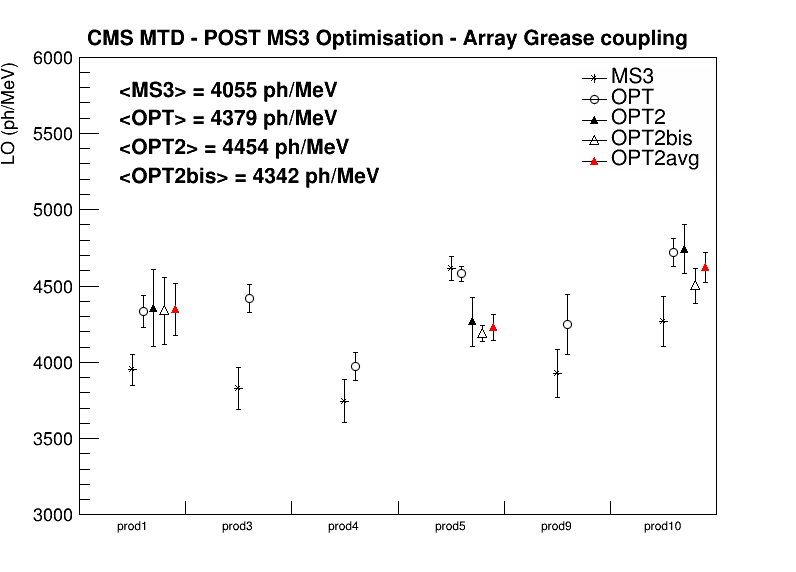

In [17]:
l.Clear()
g['LY_MS3'].Print()
g['LY_MS3'].Draw("AP*")
l.AddEntry(g['LY_MS3'],"MS3","PL")
g['LY_MS3'].GetHistogram().GetYaxis().SetLimits(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetRangeUser(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetTitle("LO (ph/MeV)")
g['LY_OPT'].SetMarkerStyle(24)
g['LY_OPT'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT'],"OPT","PL")
g['LY_OPT'].Draw("PSAME")
g['LY_OPT2'].SetMarkerStyle(22)
g['LY_OPT2'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT2'],"OPT2","PL")
g['LY_OPT2'].Draw("PSAME")
g['LY_OPT2bis'].SetMarkerStyle(26)
g['LY_OPT2bis'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT2bis'],"OPT2bis","PL")
g['LY_OPT2bis'].Draw("PSAME")
g['LY_OPT2avg'].SetMarkerStyle(22)
g['LY_OPT2avg'].SetMarkerColor(R.kRed)
g['LY_OPT2avg'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT2avg'],"OPT2avg","PL")
g['LY_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_MS3'].GetY())))
tL.DrawLatexNDC(0.15,0.78,'<OPT> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_OPT'].GetY())))
tL.DrawLatexNDC(0.15,0.73,'<OPT2> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_OPT2'].GetY())*2))#multiply by 2 because half of elements are empty
tL.DrawLatexNDC(0.15,0.68,'<OPT2bis> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_OPT2bis'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=1.52215, ex[0]=0.03, ey[0]=0.03
x[1]=1, y[1]=1.53002, ex[1]=0.03, ey[1]=0.03
x[2]=2, y[2]=1.47036, ex[2]=0.03, ey[2]=0.03
x[3]=3, y[3]=1.65706, ex[3]=0.03, ey[3]=0.03
x[4]=4, y[4]=1.47181, ex[4]=0.03, ey[4]=0.03
x[5]=5, y[5]=1.55668, ex[5]=0.03, ey[5]=0.03


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.pdf has been created


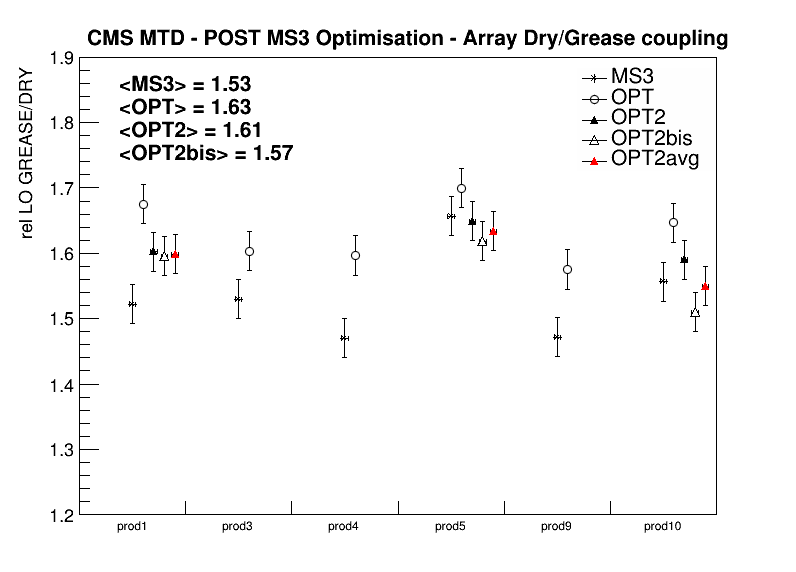

In [18]:
g['LY_DRY_GREASE_MS3'].Print()
g['LY_DRY_GREASE_MS3'].Draw("AP*")
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetLimits(1.2,1.9)
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetRangeUser(1.2,1.9)
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetTitle("rel LO GREASE/DRY")
g['LY_DRY_GREASE_OPT'].SetMarkerStyle(24)
g['LY_DRY_GREASE_OPT'].SetMarkerSize(1.2)
g['LY_DRY_GREASE_OPT'].Draw("PSAME")
g['LY_DRY_GREASE_OPT2'].SetMarkerStyle(22)
g['LY_DRY_GREASE_OPT2'].SetMarkerSize(1.2)
g['LY_DRY_GREASE_OPT2'].Draw("PSAME")
g['LY_DRY_GREASE_OPT2bis'].SetMarkerStyle(26)
g['LY_DRY_GREASE_OPT2bis'].SetMarkerSize(1.2)
g['LY_DRY_GREASE_OPT2bis'].Draw("PSAME")
g['LY_DRY_GREASE_OPT2avg'].SetMarkerStyle(22)
g['LY_DRY_GREASE_OPT2avg'].SetMarkerColor(R.kRed)
g['LY_DRY_GREASE_OPT2avg'].SetMarkerSize(1.2)
g['LY_DRY_GREASE_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Dry/Grease coupling')
tL.DrawLatexNDC(0.15,0.84,'<MS3> = %.2f'%(R.TMath.Mean(6,g['LY_DRY_GREASE_MS3'].GetY())))
tL.DrawLatexNDC(0.15,0.80,'<OPT> = %.2f'%(R.TMath.Mean(6,g['LY_DRY_GREASE_OPT'].GetY())))
tL.DrawLatexNDC(0.15,0.76,'<OPT2> = %.2f'%(R.TMath.Mean(6,g['LY_DRY_GREASE_OPT2'].GetY())*2))#multiply by 2 because half of elements are empty
tL.DrawLatexNDC(0.15,0.72,'<OPT2bis> = %.2f'%(R.TMath.Mean(6,g['LY_DRY_GREASE_OPT2bis'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=96.8065, ex[0]=0, ey[0]=3.88181
x[1]=1, y[1]=99.3941, ex[1]=0, ey[1]=5.24674
x[2]=2, y[2]=99.799, ex[2]=0, ey[2]=4.1517
x[3]=3, y[3]=91.1651, ex[3]=0, ey[3]=3.15793
x[4]=4, y[4]=101.733, ex[4]=0, ey[4]=9.05018
x[5]=5, y[5]=92.061, ex[5]=0, ey[5]=6.67867


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT_ARRAY_byProd.pdf has been created


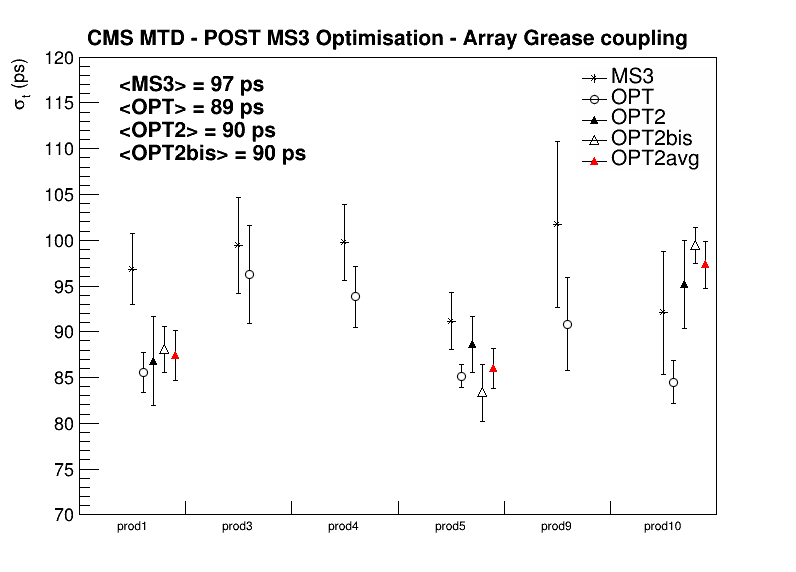

In [19]:
g['sigmaT_MS3'].Print()
g['sigmaT_MS3'].Draw("AP*")
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetLimits(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaT_OPT'].SetMarkerStyle(24)
g['sigmaT_OPT'].SetMarkerSize(1.2)
g['sigmaT_OPT'].Draw("PSAME")
g['sigmaT_OPT2'].SetMarkerStyle(22)
g['sigmaT_OPT2'].SetMarkerSize(1.2)
g['sigmaT_OPT2'].Draw("PSAME")
g['sigmaT_OPT2bis'].SetMarkerStyle(26)
g['sigmaT_OPT2bis'].SetMarkerSize(1.2)
g['sigmaT_OPT2bis'].Draw("PSAME")
g['sigmaT_OPT2avg'].SetMarkerStyle(22)
g['sigmaT_OPT2avg'].SetMarkerColor(R.kRed)
g['sigmaT_OPT2avg'].SetMarkerSize(1.2)
g['sigmaT_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.84,'<MS3> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_MS3'].GetY())))
tL.DrawLatexNDC(0.15,0.80,'<OPT> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_OPT'].GetY())))
tL.DrawLatexNDC(0.15,0.76,'<OPT2> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_OPT2'].GetY())*2))#multiply by 2 because half of elements are empty
tL.DrawLatexNDC(0.15,0.72,'<OPT2bis> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_OPT2bis'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=118.983, ex[0]=0, ey[0]=4.49715
x[1]=1, y[1]=124.461, ex[1]=0, ey[1]=7.28023
x[2]=2, y[2]=130.78, ex[2]=0, ey[2]=5.41889
x[3]=3, y[3]=104.711, ex[3]=0, ey[3]=3.81231
x[4]=4, y[4]=128.895, ex[4]=0, ey[4]=10.4804
x[5]=5, y[5]=109.975, ex[5]=0, ey[5]=6.55757


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.pdf has been created


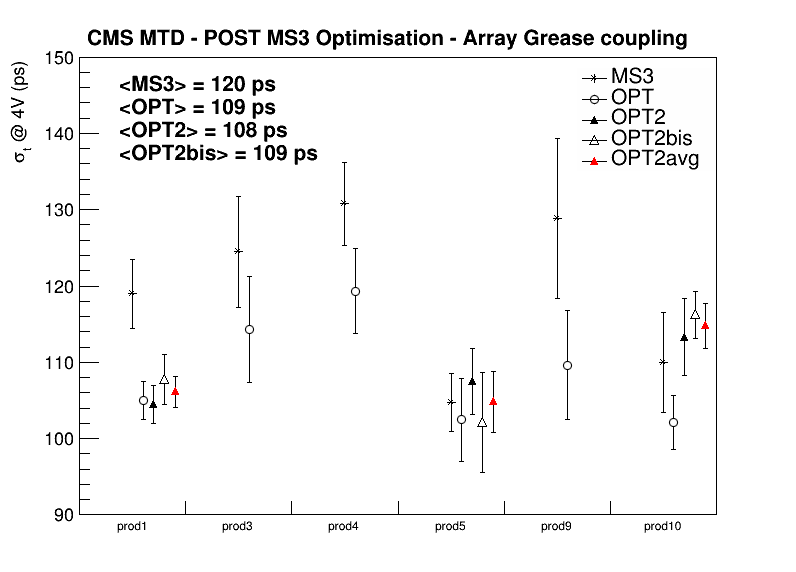

In [20]:
g['sigmaT_4V_MS3'].Print()
g['sigmaT_4V_MS3'].Draw("AP*")
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetLimits(90,150)
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetRangeUser(90,150)
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} @ 4V (ps)")
g['sigmaT_4V_OPT'].SetMarkerStyle(24)
g['sigmaT_4V_OPT'].SetMarkerSize(1.2)
g['sigmaT_4V_OPT'].Draw("PSAME")
g['sigmaT_4V_OPT2'].SetMarkerStyle(22)
g['sigmaT_4V_OPT2'].SetMarkerSize(1.2)
g['sigmaT_4V_OPT2'].Draw("PSAME")
g['sigmaT_4V_OPT2bis'].SetMarkerStyle(26)
g['sigmaT_4V_OPT2bis'].SetMarkerSize(1.2)
g['sigmaT_4V_OPT2bis'].Draw("PSAME")
g['sigmaT_4V_OPT2avg'].SetMarkerStyle(22)
g['sigmaT_4V_OPT2avg'].SetMarkerColor(R.kRed)
g['sigmaT_4V_OPT2avg'].SetMarkerSize(1.2)
g['sigmaT_4V_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.84,'<MS3> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_4V_MS3'].GetY())))
tL.DrawLatexNDC(0.15,0.80,'<OPT> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_4V_OPT'].GetY())))
tL.DrawLatexNDC(0.15,0.76,'<OPT2> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_4V_OPT2'].GetY())*2))#multiply by 2 because half of elements are empty
tL.DrawLatexNDC(0.15,0.72,'<OPT2bis> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_4V_OPT2bis'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=95.1625, ex[0]=0, ey[0]=2.52311
x[1]=1, y[1]=98.9939, ex[1]=0, ey[1]=3.56436
x[2]=2, y[2]=90.2181, ex[2]=0, ey[2]=3.43079
x[3]=3, y[3]=118.542, ex[3]=0, ey[3]=1.98364
x[4]=4, y[4]=94.7121, ex[4]=0, ey[4]=3.78897
x[5]=5, y[5]=105.182, ex[5]=0, ey[5]=4.02043


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LYDT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LYDT_ARRAY_byProd.pdf has been created


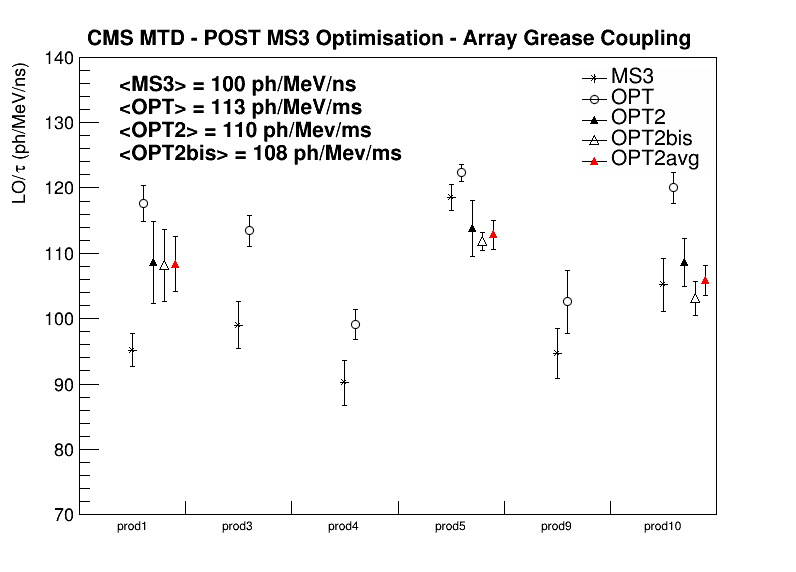

In [21]:
g['LYDT_MS3'].Print()
g['LYDT_MS3'].Draw("AP*")
g['LYDT_MS3'].GetHistogram().GetYaxis().SetLimits(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['LYDT_OPT'].SetMarkerStyle(24)
g['LYDT_OPT'].SetMarkerSize(1.2)
g['LYDT_OPT'].Draw("PSAME")
g['LYDT_OPT2'].SetMarkerStyle(22)
g['LYDT_OPT2'].SetMarkerSize(1.2)
g['LYDT_OPT2'].Draw("PSAME")
g['LYDT_OPT2bis'].SetMarkerStyle(26)
g['LYDT_OPT2bis'].SetMarkerSize(1.2)
g['LYDT_OPT2bis'].Draw("PSAME")
g['LYDT_OPT2avg'].SetMarkerStyle(22)
g['LYDT_OPT2avg'].SetMarkerColor(R.kRed)
g['LYDT_OPT2avg'].SetMarkerSize(1.2)
g['LYDT_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease Coupling')
tL.DrawLatexNDC(0.15,0.84,'<MS3> = %.0f ph/MeV/ns'%(R.TMath.Mean(6,g['LYDT_MS3'].GetY())))
tL.DrawLatexNDC(0.15,0.80,'<OPT> = %.0f ph/MeV/ms'%(R.TMath.Mean(6,g['LYDT_OPT'].GetY())))
tL.DrawLatexNDC(0.15,0.76,'<OPT2> = %.0f ph/Mev/ms'%(R.TMath.Mean(6,g['LYDT_OPT2'].GetY())*2))#multiply by 2 because half of elements are empty
tL.DrawLatexNDC(0.15,0.72,'<OPT2bis> = %.0f ph/Mev/ms'%(R.TMath.Mean(6,g['LYDT_OPT2bis'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LYDT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=0.161331, ex[0]=0, ey[0]=0.0111908
x[1]=1, y[1]=0.186814, ex[1]=0, ey[1]=0.0165171
x[2]=2, y[2]=0.183841, ex[2]=0, ey[2]=0.0154871
x[3]=3, y[3]=0.211497, ex[3]=0, ey[3]=0.0151006
x[4]=4, y[4]=0.162088, ex[4]=0, ey[4]=0.0172198
x[5]=5, y[5]=0.150696, ex[5]=0, ey[5]=0.0156174


Info in <TCanvas::Print>: png file plots/LYSO_OPT_XT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_XT_ARRAY_byProd.pdf has been created


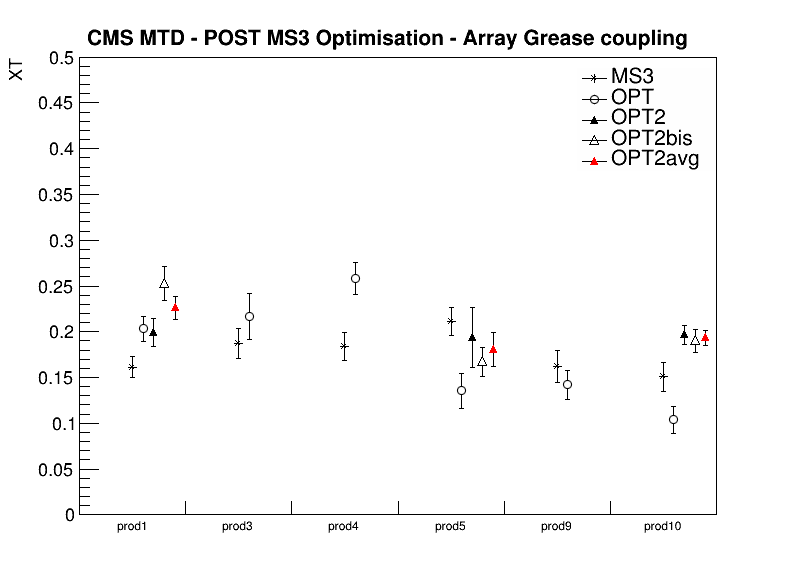

In [22]:
g['XT_MS3'].Print()
g['XT_MS3'].Draw("AP*")
g['XT_MS3'].GetHistogram().GetYaxis().SetLimits(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetRangeUser(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetTitle("XT")
g['XT_OPT'].SetMarkerStyle(24)
g['XT_OPT'].SetMarkerSize(1.2)
g['XT_OPT'].Draw("PSAME")
g['XT_OPT2'].SetMarkerStyle(22)
g['XT_OPT2'].SetMarkerSize(1.2)
g['XT_OPT2'].Draw("PSAME")
g['XT_OPT2bis'].SetMarkerStyle(26)
g['XT_OPT2bis'].SetMarkerSize(1.2)
g['XT_OPT2bis'].Draw("PSAME")
g['XT_OPT2avg'].SetMarkerStyle(22)
g['XT_OPT2avg'].SetMarkerColor(R.kRed)
g['XT_OPT2avg'].SetMarkerSize(1.2)
g['XT_OPT2avg'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')

c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_XT_ARRAY_byProd.%s'%ext)

x[0]=95.1625, y[0]=96.8065, ex[0]=2.52311, ey[0]=3.88181
x[1]=98.9939, y[1]=99.3941, ex[1]=3.56436, ey[1]=5.24674
x[2]=90.2181, y[2]=99.799, ex[2]=3.43079, ey[2]=4.1517
x[3]=118.542, y[3]=91.1651, ex[3]=1.98364, ey[3]=3.15793
x[4]=94.7121, y[4]=101.733, ex[4]=3.78897, ey[4]=9.05018
x[5]=105.182, y[5]=92.061, ex[5]=4.02043, ey[5]=6.67867


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.pdf has been created


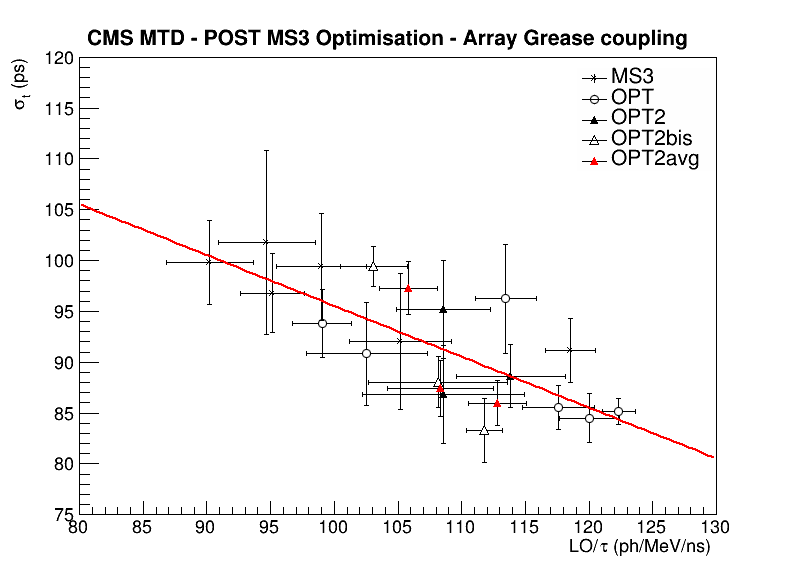

In [23]:
g['sigmaTvsLYDT_MS3'].Print()
g['sigmaTvsLYDT_MS3'].Draw("AP*")
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetLimits(75,120)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(75,120)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetLimits(80,130)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetRangeUser(80,130)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['sigmaTvsLYDT_OPT'].SetMarkerStyle(24)
g['sigmaTvsLYDT_OPT'].SetMarkerSize(1.2)
g['sigmaTvsLYDT_OPT'].Draw("PSAME")
g['sigmaTvsLYDT_OPT2'].SetMarkerStyle(22)
g['sigmaTvsLYDT_OPT2'].SetMarkerSize(1.2)
g['sigmaTvsLYDT_OPT2'].Draw("PSAME")
g['sigmaTvsLYDT_OPT2bis'].SetMarkerStyle(26)
g['sigmaTvsLYDT_OPT2bis'].SetMarkerSize(1.2)
g['sigmaTvsLYDT_OPT2bis'].Draw("PSAME")
g['sigmaTvsLYDT_OPT2avg'].SetMarkerStyle(22)
g['sigmaTvsLYDT_OPT2avg'].SetMarkerColor(R.kRed)
g['sigmaTvsLYDT_OPT2avg'].SetMarkerSize(1.2)
g['sigmaTvsLYDT_OPT2avg'].Draw("PSAME")
f1=R.TF1('ff','[0]+[1]*x',0,200)
f1.SetParameter(0,145.5)
f1.SetParameter(1,-0.5)
f1.Draw('SAME')
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.%s'%ext)

x[0]=95.1625, y[0]=118.983, ex[0]=2.52311, ey[0]=4.49715
x[1]=98.9939, y[1]=124.461, ex[1]=3.56436, ey[1]=7.28023
x[2]=90.2181, y[2]=130.78, ex[2]=3.43079, ey[2]=5.41889
x[3]=118.542, y[3]=104.711, ex[3]=1.98364, ey[3]=3.81231
x[4]=94.7121, y[4]=128.895, ex[4]=3.78897, ey[4]=10.4804
x[5]=105.182, y[5]=109.975, ex[5]=4.02043, ey[5]=6.55757


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.pdf has been created


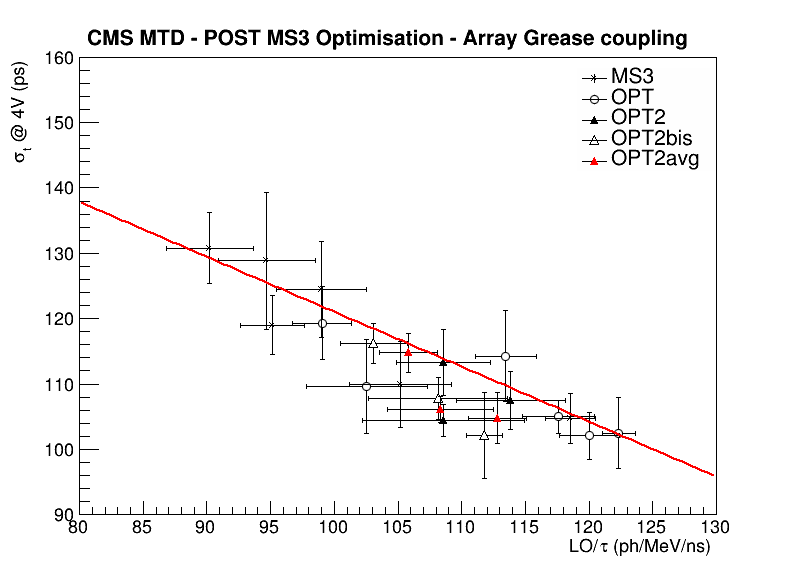

In [24]:
g['sigmaT4VvsLYDT_MS3'].Print()
g['sigmaT4VvsLYDT_MS3'].Draw("AP*")
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetLimits(90,160)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(90,160)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetLimits(80,130)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetRangeUser(80,130)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} @ 4V (ps)")
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['sigmaT4VvsLYDT_OPT'].SetMarkerStyle(24)
g['sigmaT4VvsLYDT_OPT'].SetMarkerSize(1.2)
g['sigmaT4VvsLYDT_OPT'].Draw("PSAME")
g['sigmaT4VvsLYDT_OPT2'].SetMarkerStyle(22)
g['sigmaT4VvsLYDT_OPT2'].SetMarkerSize(1.2)
g['sigmaT4VvsLYDT_OPT2'].Draw("PSAME")
g['sigmaT4VvsLYDT_OPT2bis'].SetMarkerStyle(26)
g['sigmaT4VvsLYDT_OPT2bis'].SetMarkerSize(1.2)
g['sigmaT4VvsLYDT_OPT2bis'].Draw("PSAME")
g['sigmaT4VvsLYDT_OPT2avg'].SetMarkerStyle(22)
g['sigmaT4VvsLYDT_OPT2avg'].SetMarkerColor(R.kRed)
g['sigmaT4VvsLYDT_OPT2avg'].SetMarkerSize(1.2)
g['sigmaT4VvsLYDT_OPT2avg'].Draw("PSAME")
f2=R.TF1('ff2','[0]+[1]*x',0,200)
f2.SetParameter(0,205)
f2.SetParameter(1,-0.84)
f2.Draw('SAME')
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.%s'%ext)

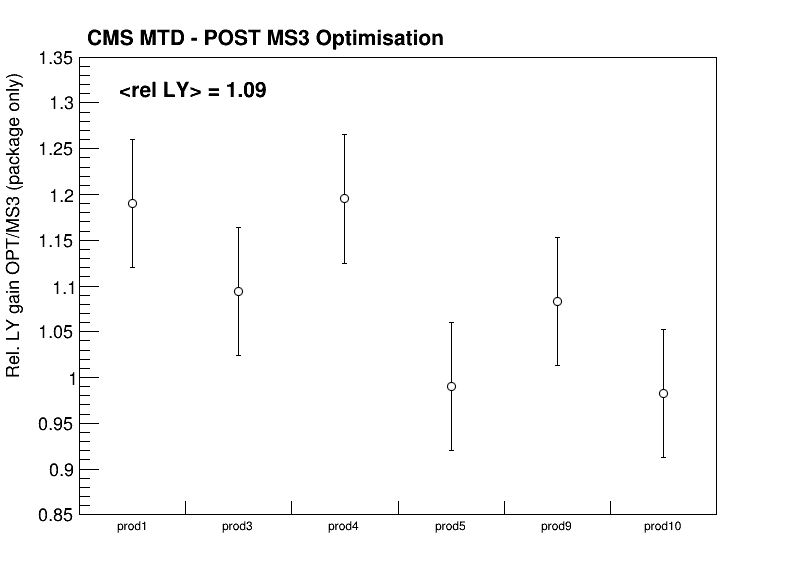

In [25]:
g['relGain_LY_OPT'].Draw("AP")
g['relGain_LY_OPT'].GetYaxis().SetTitle('Rel. LY gain OPT/MS3 (package only)')
g['relGain_LY_OPT'].GetYaxis().SetLimits(0.85,1.35)
g['relGain_LY_OPT'].GetYaxis().SetRangeUser(0.85,1.35)
g['relGain_LY_OPT'].SetMarkerStyle(24)
g['relGain_LY_OPT'].SetMarkerSize(1.2)
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation')
tL.DrawLatexNDC(0.15,0.83,'<rel LY> = %.2f'%R.TMath.Mean(6,g['relGain_LY_OPT'].GetY()))
c1.Draw()

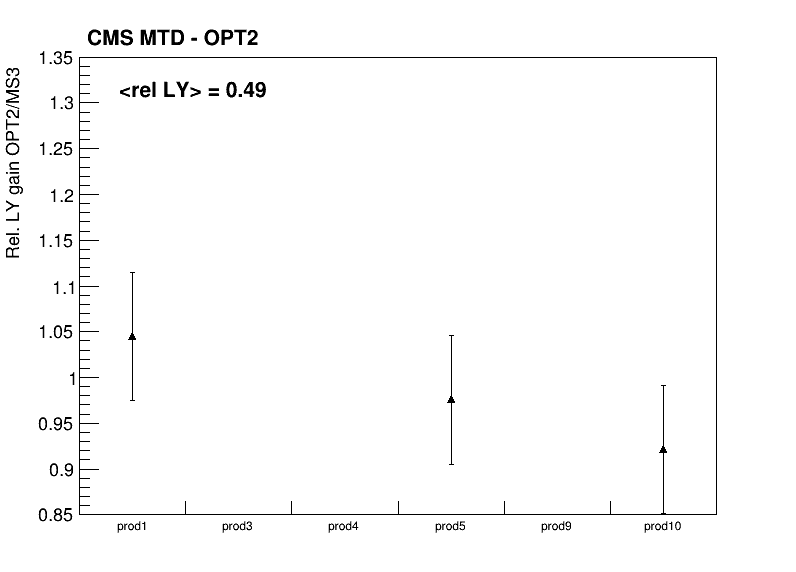

In [26]:
g['relGain_LY_OPT2'].Draw("AP")
g['relGain_LY_OPT2'].GetYaxis().SetTitle('Rel. LY gain OPT2/MS3')
g['relGain_LY_OPT2'].GetYaxis().SetLimits(0.85,1.35)
g['relGain_LY_OPT2'].GetYaxis().SetRangeUser(0.85,1.35)
g['relGain_LY_OPT2'].SetMarkerStyle(22)
g['relGain_LY_OPT2'].SetMarkerSize(1.2)
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - OPT2')
tL.DrawLatexNDC(0.15,0.83,'<rel LY> = %.2f'%R.TMath.Mean(6,g['relGain_LY_OPT2'].GetY()))
c1.Draw()

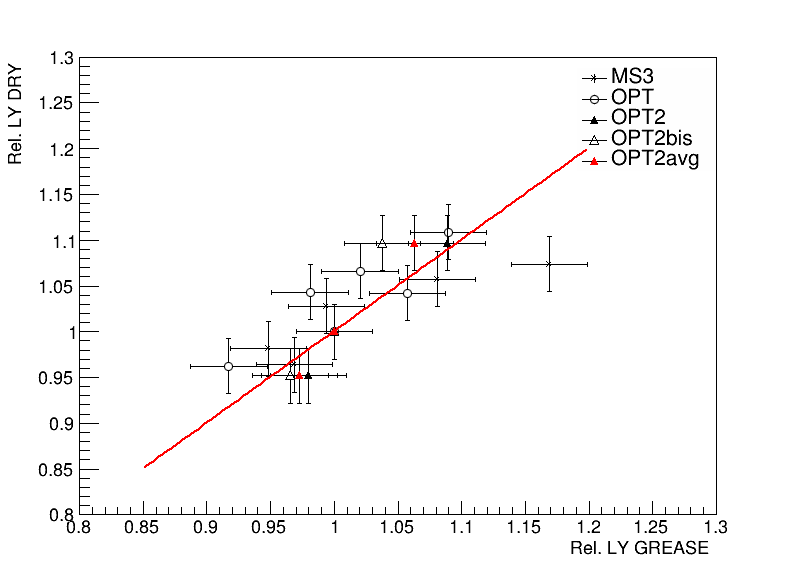

In [30]:
g['rel_MS3_DRY_GREASE'].Draw('AP*')
g['rel_MS3_DRY_GREASE'].GetYaxis().SetTitle('Rel. LY DRY')
g['rel_MS3_DRY_GREASE'].GetYaxis().SetLimits(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetYaxis().SetRangeUser(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetXaxis().SetTitle('Rel. LY GREASE')
g['rel_MS3_DRY_GREASE'].GetXaxis().SetLimits(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetXaxis().SetRangeUser(0.8,1.3)
g['rel_OPT_DRY_GREASE'].SetMarkerStyle(24)
g['rel_OPT_DRY_GREASE'].SetMarkerSize(1.2)
g['rel_OPT_DRY_GREASE'].Draw('PSAME')
g['rel_OPT2_DRY_GREASE'].SetMarkerStyle(22)
g['rel_OPT2_DRY_GREASE'].SetMarkerSize(1.2)
g['rel_OPT2_DRY_GREASE'].Draw('PSAME')
g['rel_OPT2bis_DRY_GREASE'].SetMarkerStyle(26)
g['rel_OPT2bis_DRY_GREASE'].SetMarkerSize(1.2)
g['rel_OPT2bis_DRY_GREASE'].Draw("PSAME")
g['rel_OPT2avg_DRY_GREASE'].SetMarkerStyle(22)
g['rel_OPT2avg_DRY_GREASE'].SetMarkerColor(R.kRed)
g['rel_OPT2avg_DRY_GREASE'].SetMarkerSize(1.2)
g['rel_OPT2avg_DRY_GREASE'].Draw("PSAME")
f3=R.TF1('f3','x',0.85,1.2)
f3.Draw('SAME')
l.Draw()
c1.Draw()

In [28]:
fOut=R.TFile('LYSO_ARRAY_Optimisation.root','RECREATE')
for hn,h in g.items():
    if "OPT2bis_PMT" in hn:
        continue
    h.Write(hn)
fOut.Close()